# Exploración de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from math import sqrt

In [2]:
root = 'España en México.xls'

df = pd.read_excel(root, parse_dates=True, header=1 )
df.head()

WARNING *** file size (32704) not 512 + multiple of sector size (512)


/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:520: UserWarning: The 'parse_dates=True' keyword of read_excel was provided without an 'index_col' keyword value.
  warn("The 'parse_dates=True' keyword of read_excel was provided"


,Elemento,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,...,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,NaN,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop([0], axis = 0)


In [4]:
df.head()

,Elemento,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,NaN,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [5]:
df.rename(columns={'Unnamed: 1':'industry',
                        'Elemento': 'country'}, inplace=True)

In [6]:
df.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,NaN,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [7]:
country_name = df['country'][1]
df['country'] = df['country'].replace(np.nan, country_name)

In [8]:
df.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,MEXICO,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [9]:
df.describe()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,88,88,22.00,25.0,22.00,30.0,33.0,30.0,30.0,33.0,...,47.0,40.0,41.0,43.0,48.0,59.0,61.0,58.0,44.0,33.0
unique,1,88,22.00,21.0,21.00,28.0,32.0,27.0,29.0,30.0,...,33.0,27.0,31.0,36.0,38.0,42.0,39.0,42.0,43.0,29.0
top,MEXICO,23 FABRICACIÓN DE OTROS PRODUCTOS MINERALES NO...,2404.05,0.0,4.81,0.0,1.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
freq,88,1,1.00,3.0,2.00,2.0,2.0,2.0,2.0,3.0,...,14.0,14.0,11.0,7.0,11.0,18.0,21.0,16.0,2.0,3.0


In [10]:
print('Tamaño del DF:', df.shape)
print('Número de valores nulos en cada columna:',df.isnull().sum())

Tamaño del DF: (88, 30)
Número de valores nulos en cada columna: country      0
industry     0
1993        66
1994        63
1995        66
1996        58
1997        55
1998        58
1999        58
2000        55
2001        53
2002        56
2003        60
2004        57
2005        57
2006        59
2007        48
2008        50
2009        46
2010        47
2011        41
2012        48
2013        47
2014        45
2015        40
2016        29
2017        27
2018        30
2019        44
2020        55
dtype: int64


In [11]:
df.dtypes

country     object
industry    object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006        object
2007        object
2008        object
2009        object
2010        object
2011        object
2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018        object
2019        object
2020        object
dtype: object

df['1993'] = df['1993'].astype(float)
df['1994'] = df['1994'].astype(float)
df['1995'] = df['1995'].astype(float)
df['1996'] = df['1996'].astype(float)
df['1997'] = df['1997'].astype(float)
df['1998'] = df['1998'].astype(float)
df['1999'] = df['1999'].astype(float)
df['2000'] = df['2000'].astype(float)
df['2001'] = df['2001'].astype(float)
df['2002'] = df['2002'].astype(float)
df['2003'] = df['2003'].astype(float)
df['2004'] = df['2004'].astype(float)
df['2005'] = df['2005'].astype(float)
df['2006'] = df['2006'].astype(float)
df['2007'] = df['2007'].astype(float)
df['2008'] = df['2008'].astype(float)
df['2009'] = df['2009'].astype(float)
df['2010'] = df['2010'].astype(float)
df['2011'] = df['2011'].astype(float)
df['2012'] = df['2012'].astype(float)
df['2013'] = df['2013'].astype(float)
df['2014'] = df['2014'].astype(float)
df['2015'] = df['2015'].astype(float)
df['2016'] = df['2016'].astype(float)
df['2017'] = df['2017'].astype(float)
df['2018'] = df['2018'].astype(float)
df['2019'] = df['2019'].astype(float)
df['2020'] = df['2020'].astype(float)

In [12]:
df.describe()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,88,88,22.00,25.0,22.00,30.0,33.0,30.0,30.0,33.0,...,47.0,40.0,41.0,43.0,48.0,59.0,61.0,58.0,44.0,33.0
unique,1,88,22.00,21.0,21.00,28.0,32.0,27.0,29.0,30.0,...,33.0,27.0,31.0,36.0,38.0,42.0,39.0,42.0,43.0,29.0
top,MEXICO,23 FABRICACIÓN DE OTROS PRODUCTOS MINERALES NO...,2404.05,0.0,4.81,0.0,1.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
freq,88,1,1.00,3.0,2.00,2.0,2.0,2.0,2.0,3.0,...,14.0,14.0,11.0,7.0,11.0,18.0,21.0,16.0,2.0,3.0


In [13]:
df_melt = df.melt(['industry','country'])
df_melt.head()

,industry,country,variable,value
0,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",MEXICO,1993,NaN
1,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,MEXICO,1993,NaN
2,03 PESCA Y ACUICULTURA,MEXICO,1993,NaN
3,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",MEXICO,1993,NaN
4,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,MEXICO,1993,NaN


In [14]:
df_melt = df_melt[['variable','value','country', 'industry']]
df_melt.head()

,variable,value,country,industry
0,1993,NaN,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,NaN,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,NaN,MEXICO,03 PESCA Y ACUICULTURA
3,1993,NaN,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,NaN,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [15]:
df_melt.rename(columns={'variable':'year',
                        'value': 'investment'}, inplace=True)

In [16]:
df_melt.head()

,year,investment,country,industry
0,1993,NaN,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,NaN,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,NaN,MEXICO,03 PESCA Y ACUICULTURA
3,1993,NaN,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,NaN,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [17]:
df_melt.columns

Index(['year', 'investment', 'country', 'industry'], dtype='object')

In [18]:
df_melt.set_index('year', inplace=True)

In [19]:
df_melt.head()

,investment,country,industry
year,,,
1993,NaN,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1993,NaN,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
1993,NaN,MEXICO,03 PESCA Y ACUICULTURA
1993,NaN,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
1993,NaN,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [20]:
df_melt.dtypes

investment    object
country       object
industry      object
dtype: object

In [21]:
df_melt['investment'] = df_melt['investment'].astype(float)
df_melt.dtypes

investment    float64
country        object
industry       object
dtype: object

In [22]:
# Suma total de inversion por año

df_total = df_melt.groupby(('year')).investment.sum().reset_index()

In [23]:
df_total.head()

,year,investment
0,1993,47135.97
1,1994,17017.75
2,1995,8263.11
3,1996,13622.50
4,1997,46830.67


In [24]:
df_total.set_index('year', inplace=True)

In [25]:
df_total

,investment
year,
1993,47135.97
1994,17017.75
1995,8263.11
1996,13622.50
1997,46830.67
1998,35710.18
1999,50166.76
2000,69985.63
2001,35130.27


In [26]:
df_melt.describe()

,investment
count,1046.000000
mean,7672.781597
std,46507.690963
min,0.000000
25%,1.620000
50%,50.000000
75%,747.790000
max,738824.630000


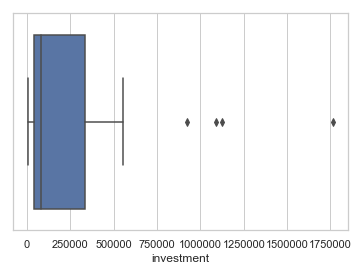

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_total["investment"])

## Analisis general de la inversión de empresas españolas en México 

In [28]:
df_total.dtypes

investment    float64
dtype: object

Text(0.5, 1.0, 'Evolución de la inversión de empresas españolas en México')

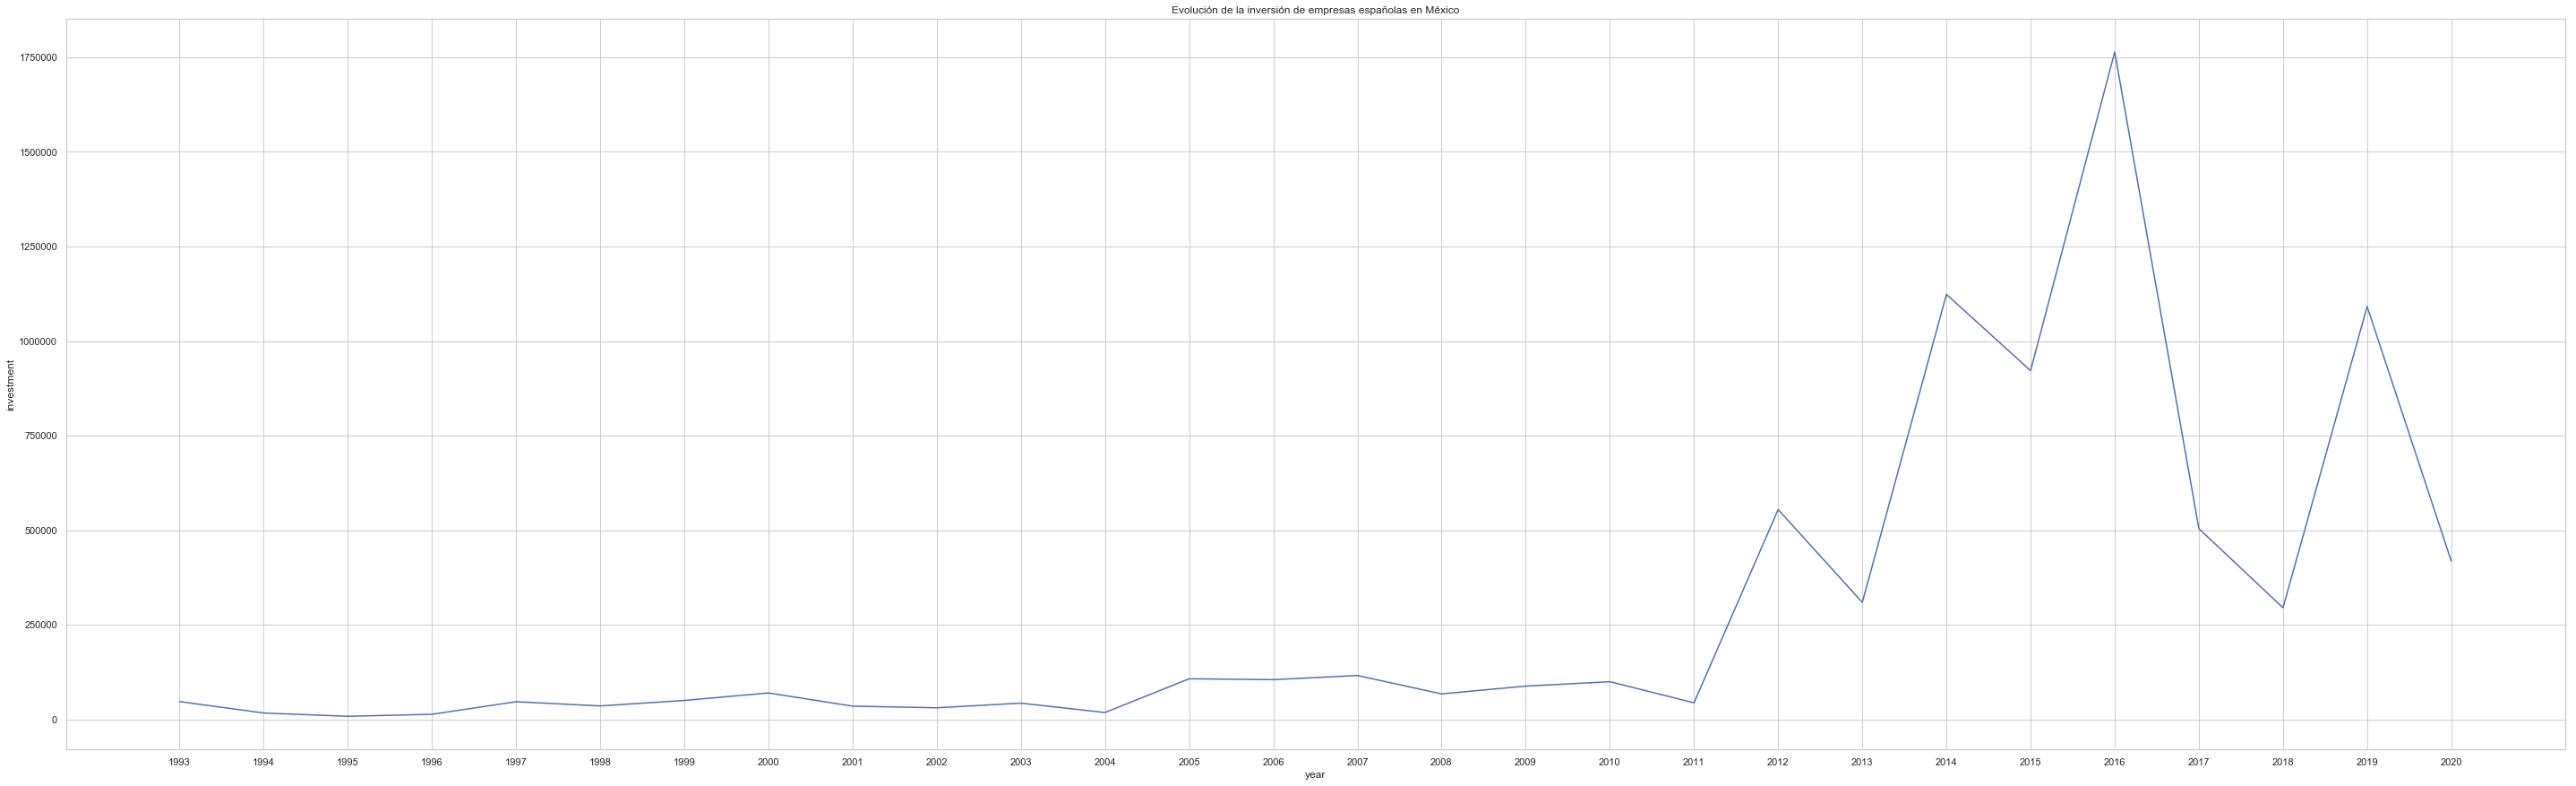

In [29]:
plt.figure(figsize=(50,15))
sns.lineplot(data=df_total, x='year', y='investment')
plt.title('Evolución de la inversión de empresas españolas en México')

In [30]:
df_max = df_total['investment'].max()

In [31]:
df_total.loc[df_total['investment'] == df_max]

,investment
year,
2016,1763920.89


## Analisis por sector de la inversión de empresas españolas en México 

In [32]:
df_melt.head()

,investment,country,industry
year,,,
1993,NaN,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1993,NaN,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
1993,NaN,MEXICO,03 PESCA Y ACUICULTURA
1993,NaN,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
1993,NaN,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [33]:
df_industry_max = df_melt['investment'].max()

In [34]:
df_melt.loc[df_melt['investment'] == df_industry_max]

,investment,country,industry
year,,,
2016,738824.63,MEXICO,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI..."


In [35]:
df_melt.dtypes

investment    float64
country        object
industry       object
dtype: object

In [36]:
df_melt['industry'].unique()

array(['01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS',
       '02 SILVICULTURA Y EXPLOTACIÓN FORESTAL', '03 PESCA Y ACUICULTURA',
       '05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO',
       '06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL',
       '07 EXTRACCIÓN DE MINERALES METÁLICOS',
       '08 OTRAS INDUSTRIAS EXTRACTIVAS',
       '09 ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS',
       '10 INDUSTRIA DE LA ALIMENTACIÓN', '11 FABRICACIÓN DE BEBIDAS',
       '12 INDUSTRIA DEL TABACO', '13 INDUSTRIA TEXTIL',
       '14 CONFECCIÓN DE PRENDAS DE VESTIR',
       '15 INDUSTRIA DEL CUERO Y DEL CALZADO',
       '16 INDUSTRIA MADERA Y CORCHO, EXCEPTO MUEBLES, CESTERÍA',
       '17 INDUSTRIA DEL PAPEL',
       '18 ARTES GRÁFICAS Y REPRODUCCIÓN DE SOPORTES GRABADOS',
       '19 COQUERÍAS Y REFINO DE PETRÓLEO', '20 INDUSTRIA QUÍMICA',
       '21 FABRICACIÓN DE PRODUCTOS FARMACÉUTICOS',
       '22 FABRICACIÓN DE PRODUCTOS DE CAUCHO Y PLÁSTICOS',
       '23 FABRICACIÓN DE OTROS PR

Text(0.5, 1.0, 'Evolución por sector de la inversión de empresas españolas en México')

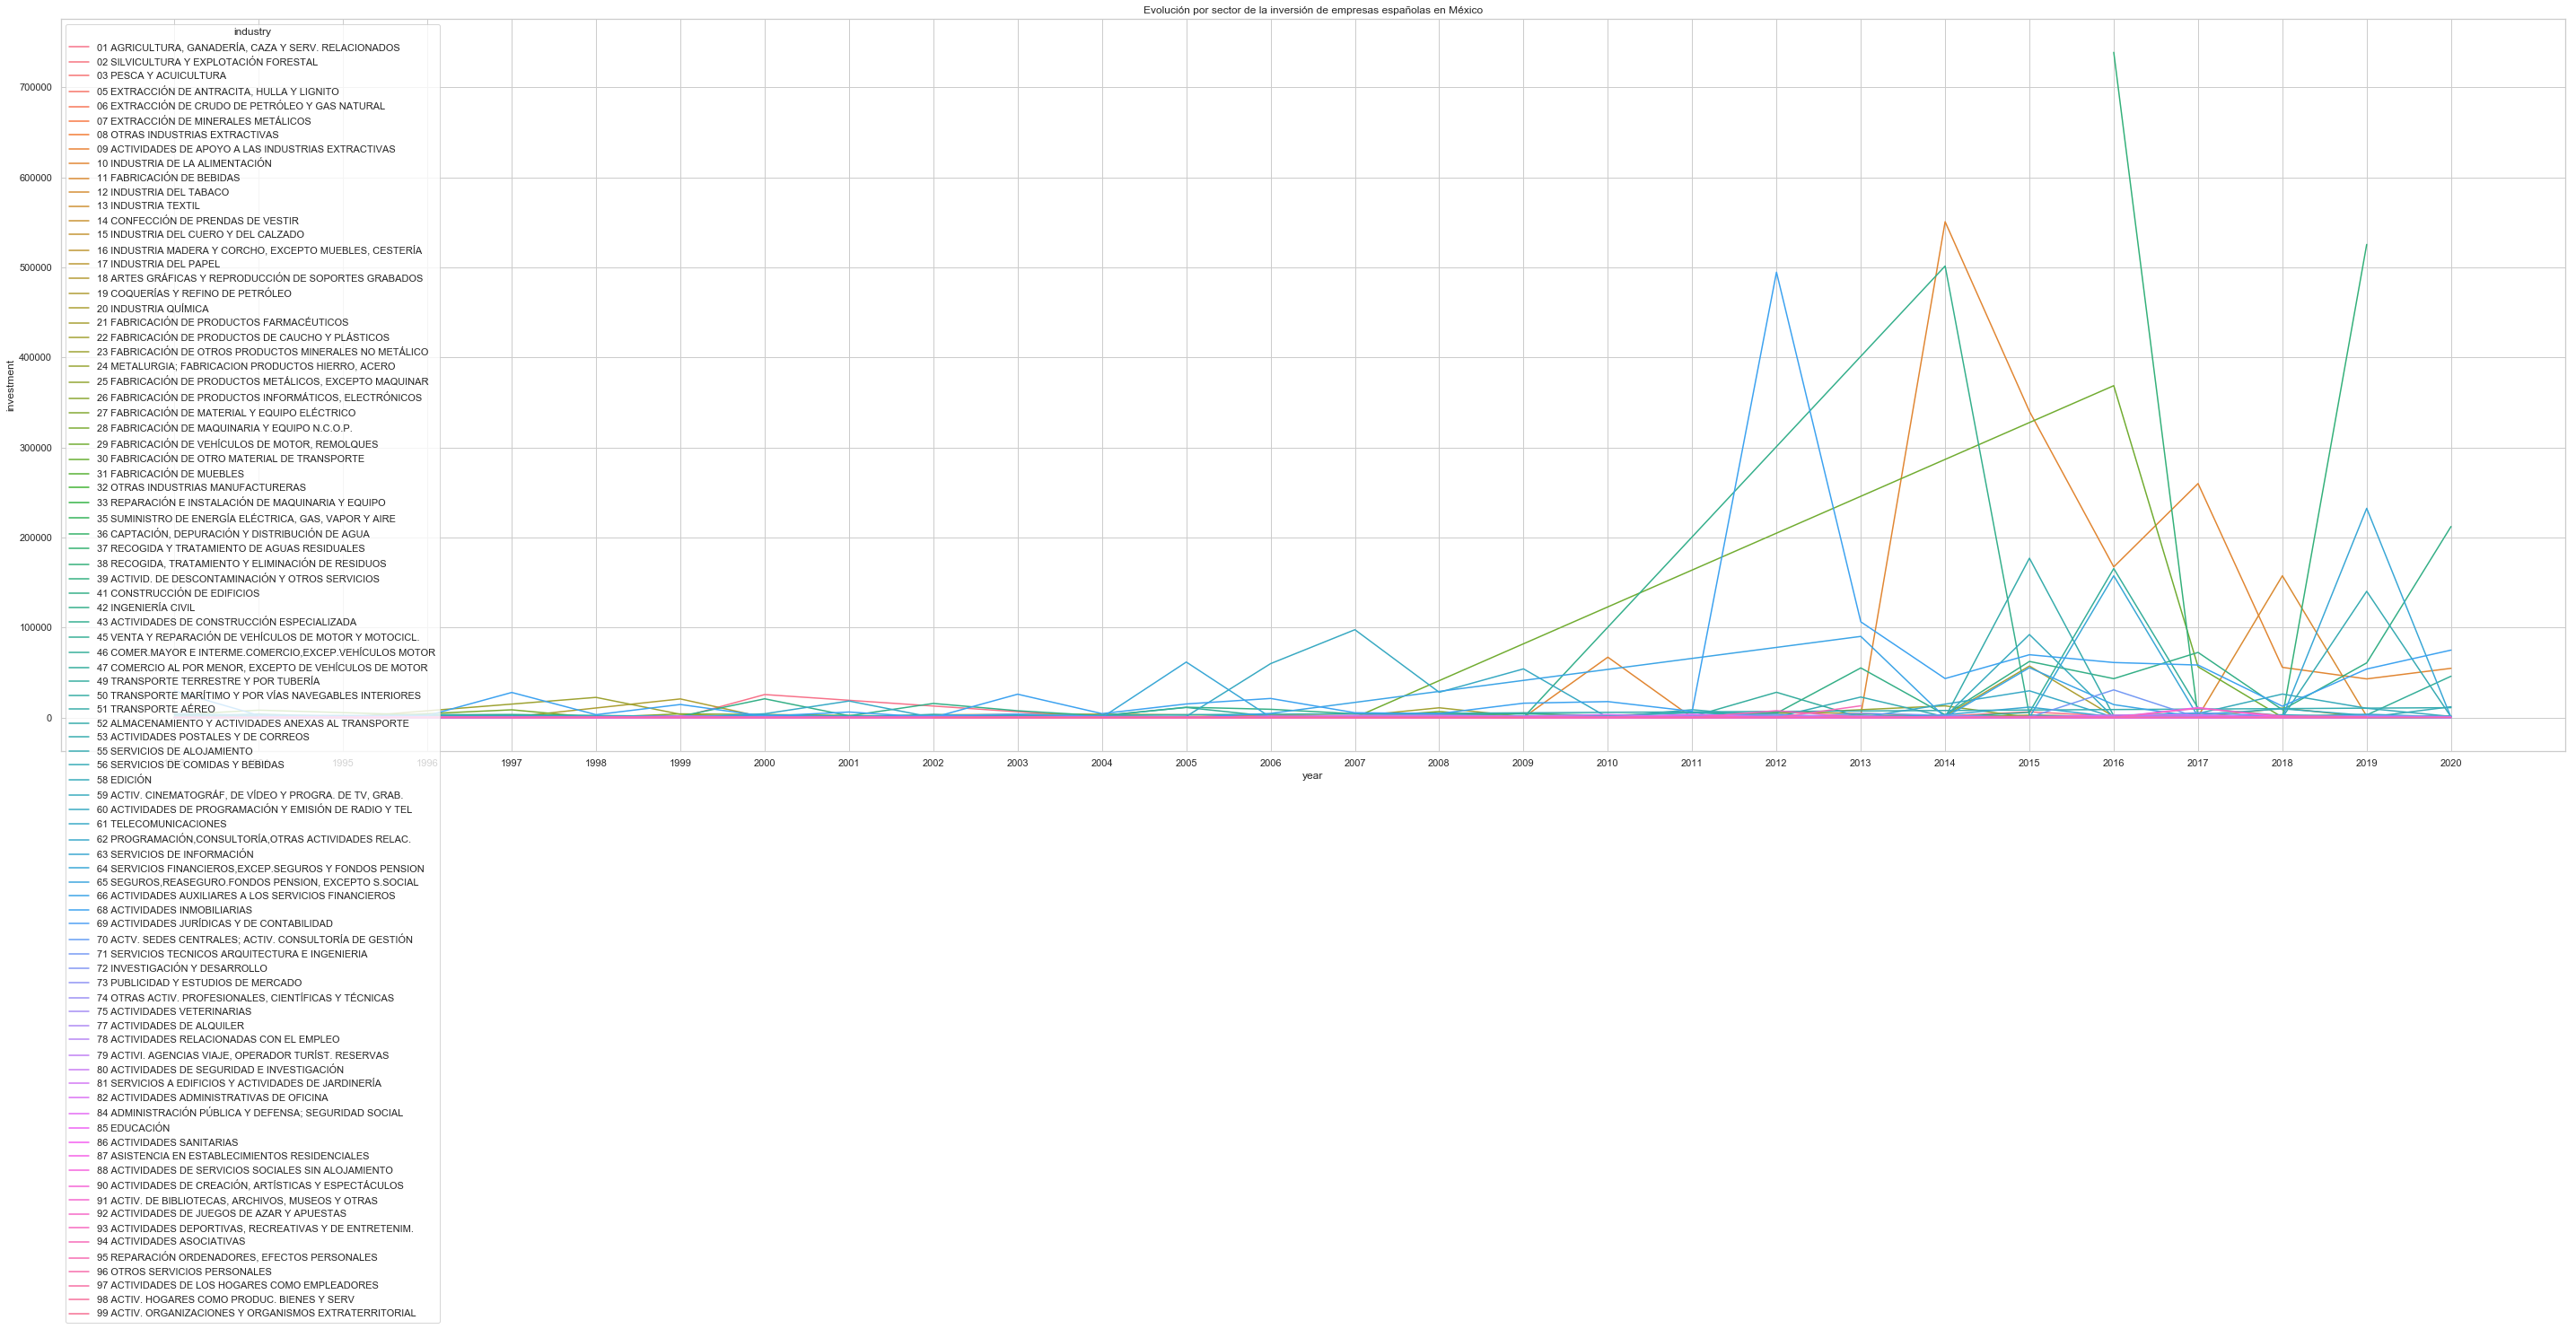

In [37]:
plt.figure(figsize=(50,15))
sns.lineplot(data=df_melt, x='year', y='investment', hue='industry')
plt.title('Evolución por sector de la inversión de empresas españolas en México')

In [38]:
df_industry = df_melt.groupby('industry').investment.sum().sort_values(ascending=False).reset_index()


In [39]:
df_industry.head(10)

,industry,investment
0,10 INDUSTRIA DE LA ALIMENTACIÓN,1548270.82
1,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",1264269.25
2,68 ACTIVIDADES INMOBILIARIAS,1179823.47
3,41 CONSTRUCCIÓN DE EDIFICIOS,625453.52
4,42 INGENIERÍA CIVIL,505040.35
5,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO...",463091.76
6,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",436579.72
7,"46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCU...",280392.32
8,60 ACTIVIDADES DE PROGRAMACIÓN Y EMISIÓN DE RA...,242993.54
9,55 SERVICIOS DE ALOJAMIENTO,187957.56


In [40]:
#df_industry.set_index('industry', inplace=True)
#df_industry.head()

Text(0.5, 1.0, 'Volumen de la inversión por sector')

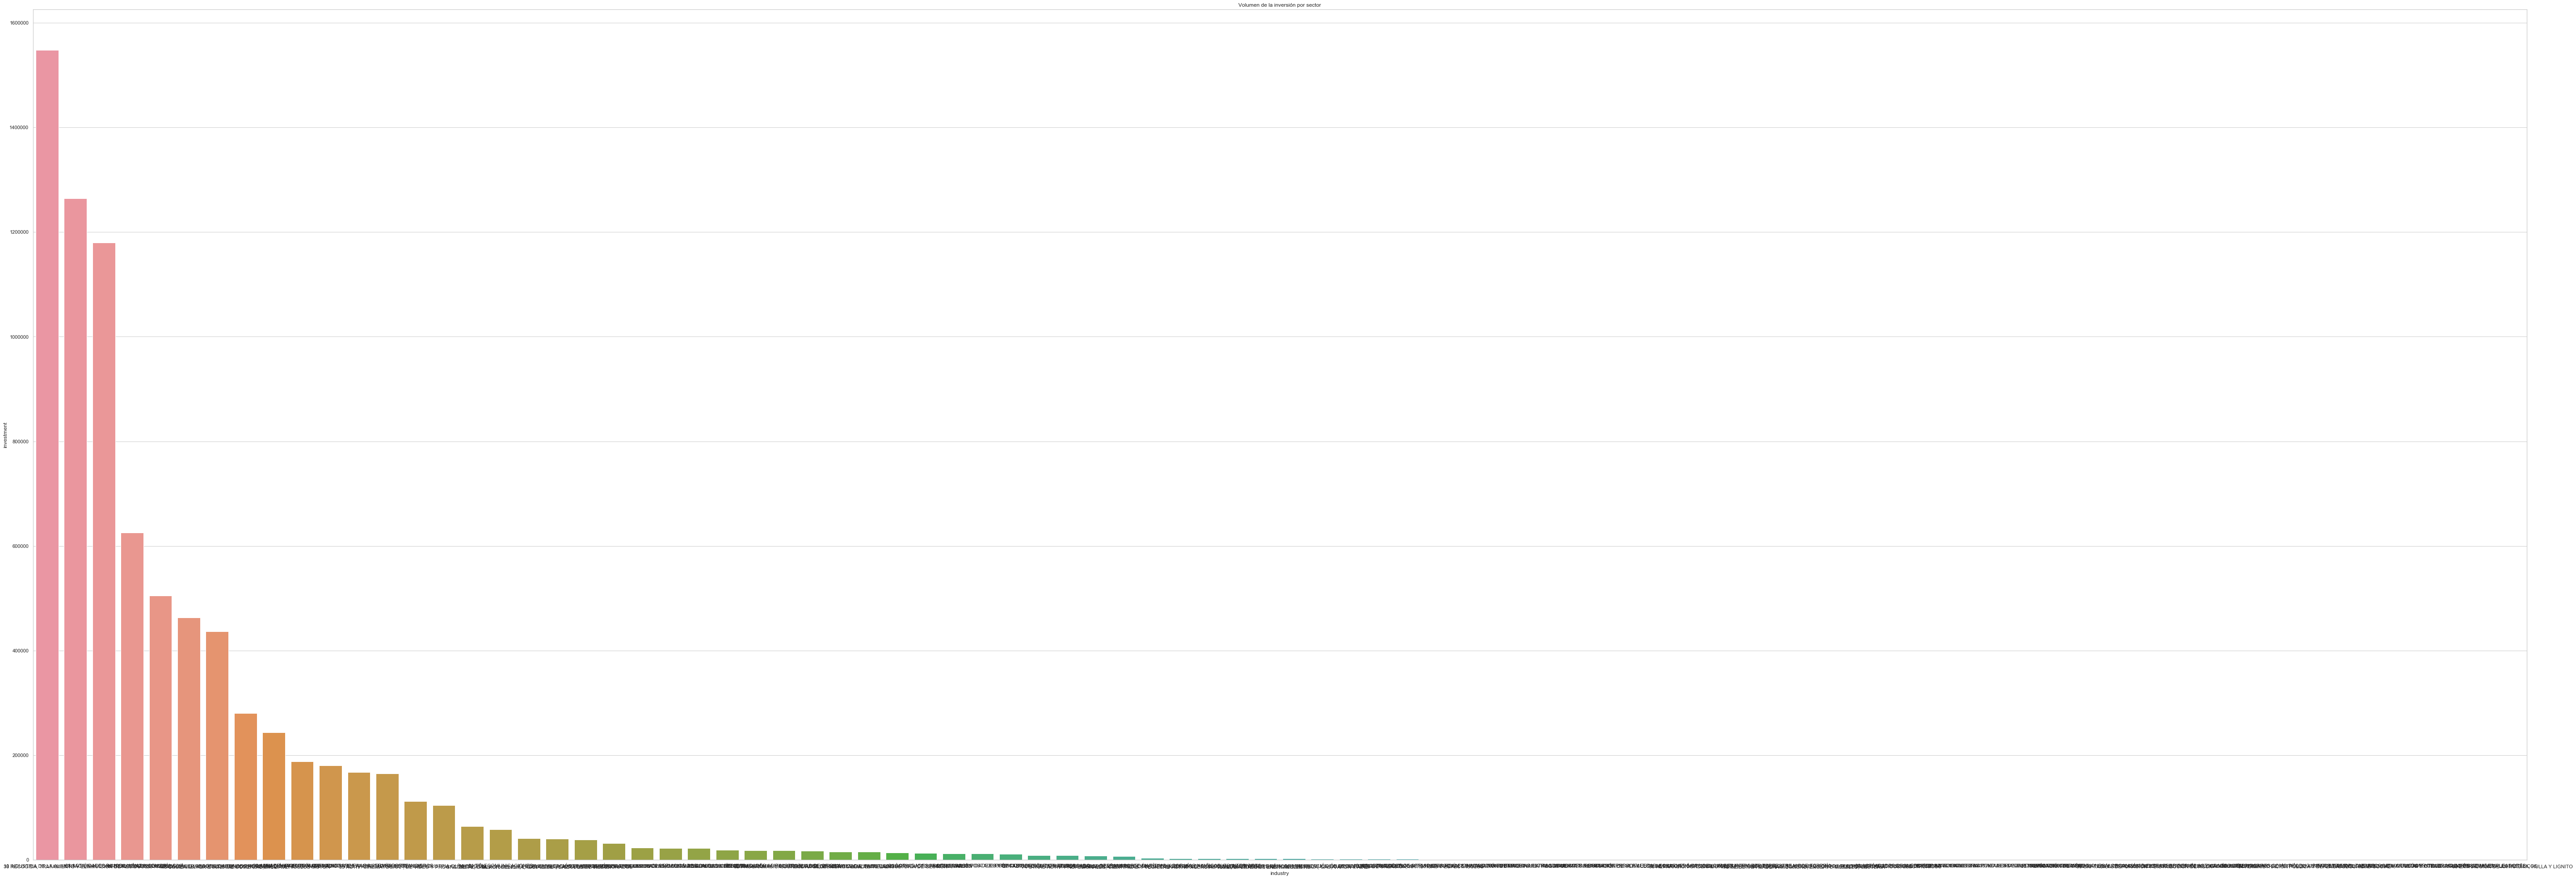

In [41]:
plt.figure(figsize=(100,35))
sns.barplot(data=df_industry, x='industry', y='investment')
plt.title('Volumen de la inversión por sector')

In [42]:
df_industry.describe()

,investment
count,8.800000e+01
mean,9.120147e+04
std,2.627967e+05
min,0.000000e+00
25%,1.870850e+02
50%,2.374625e+03
75%,2.218994e+04
max,1.548271e+06


In [43]:
#ax = sns.boxplot(x="industry", y="investment", data=df_industry)

In [44]:
df_industry.head(10)

,industry,investment
0,10 INDUSTRIA DE LA ALIMENTACIÓN,1548270.82
1,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",1264269.25
2,68 ACTIVIDADES INMOBILIARIAS,1179823.47
3,41 CONSTRUCCIÓN DE EDIFICIOS,625453.52
4,42 INGENIERÍA CIVIL,505040.35
5,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO...",463091.76
6,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",436579.72
7,"46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCU...",280392.32
8,60 ACTIVIDADES DE PROGRAMACIÓN Y EMISIÓN DE RA...,242993.54
9,55 SERVICIOS DE ALOJAMIENTO,187957.56


In [45]:
sum_investment = df_industry['investment'].sum()

In [46]:
for industry  in df_industry:
    df_industry['% total'] = df_industry['investment'] / sum_investment * 100

In [47]:
df_industry.head(10)

,industry,investment,% total
0,10 INDUSTRIA DE LA ALIMENTACIÓN,1548270.82,19.291341
1,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",1264269.25,15.752702
2,68 ACTIVIDADES INMOBILIARIAS,1179823.47,14.700514
3,41 CONSTRUCCIÓN DE EDIFICIOS,625453.52,7.793105
4,42 INGENIERÍA CIVIL,505040.35,6.292766
5,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO...",463091.76,5.770089
6,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",436579.72,5.439751
7,"46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCU...",280392.32,3.493668
8,60 ACTIVIDADES DE PROGRAMACIÓN Y EMISIÓN DE RA...,242993.54,3.027682
9,55 SERVICIOS DE ALOJAMIENTO,187957.56,2.341937


In [48]:
#los 3 primeros sectores acumulan el 50% de la inversión de España en México

In [49]:
df.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,MEXICO,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [50]:
df_alimentacion = df_melt[df_melt.industry == '10 INDUSTRIA DE LA ALIMENTACIÓN']
df_alimentacion.head()

,investment,country,industry
year,,,
1993,NaN,MEXICO,10 INDUSTRIA DE LA ALIMENTACIÓN
1994,1.50,MEXICO,10 INDUSTRIA DE LA ALIMENTACIÓN
1995,NaN,MEXICO,10 INDUSTRIA DE LA ALIMENTACIÓN
1996,7.21,MEXICO,10 INDUSTRIA DE LA ALIMENTACIÓN
1997,0.84,MEXICO,10 INDUSTRIA DE LA ALIMENTACIÓN


Text(0.5, 1.0, 'Evolución de la inversion española en México en el sector de la alimentación')

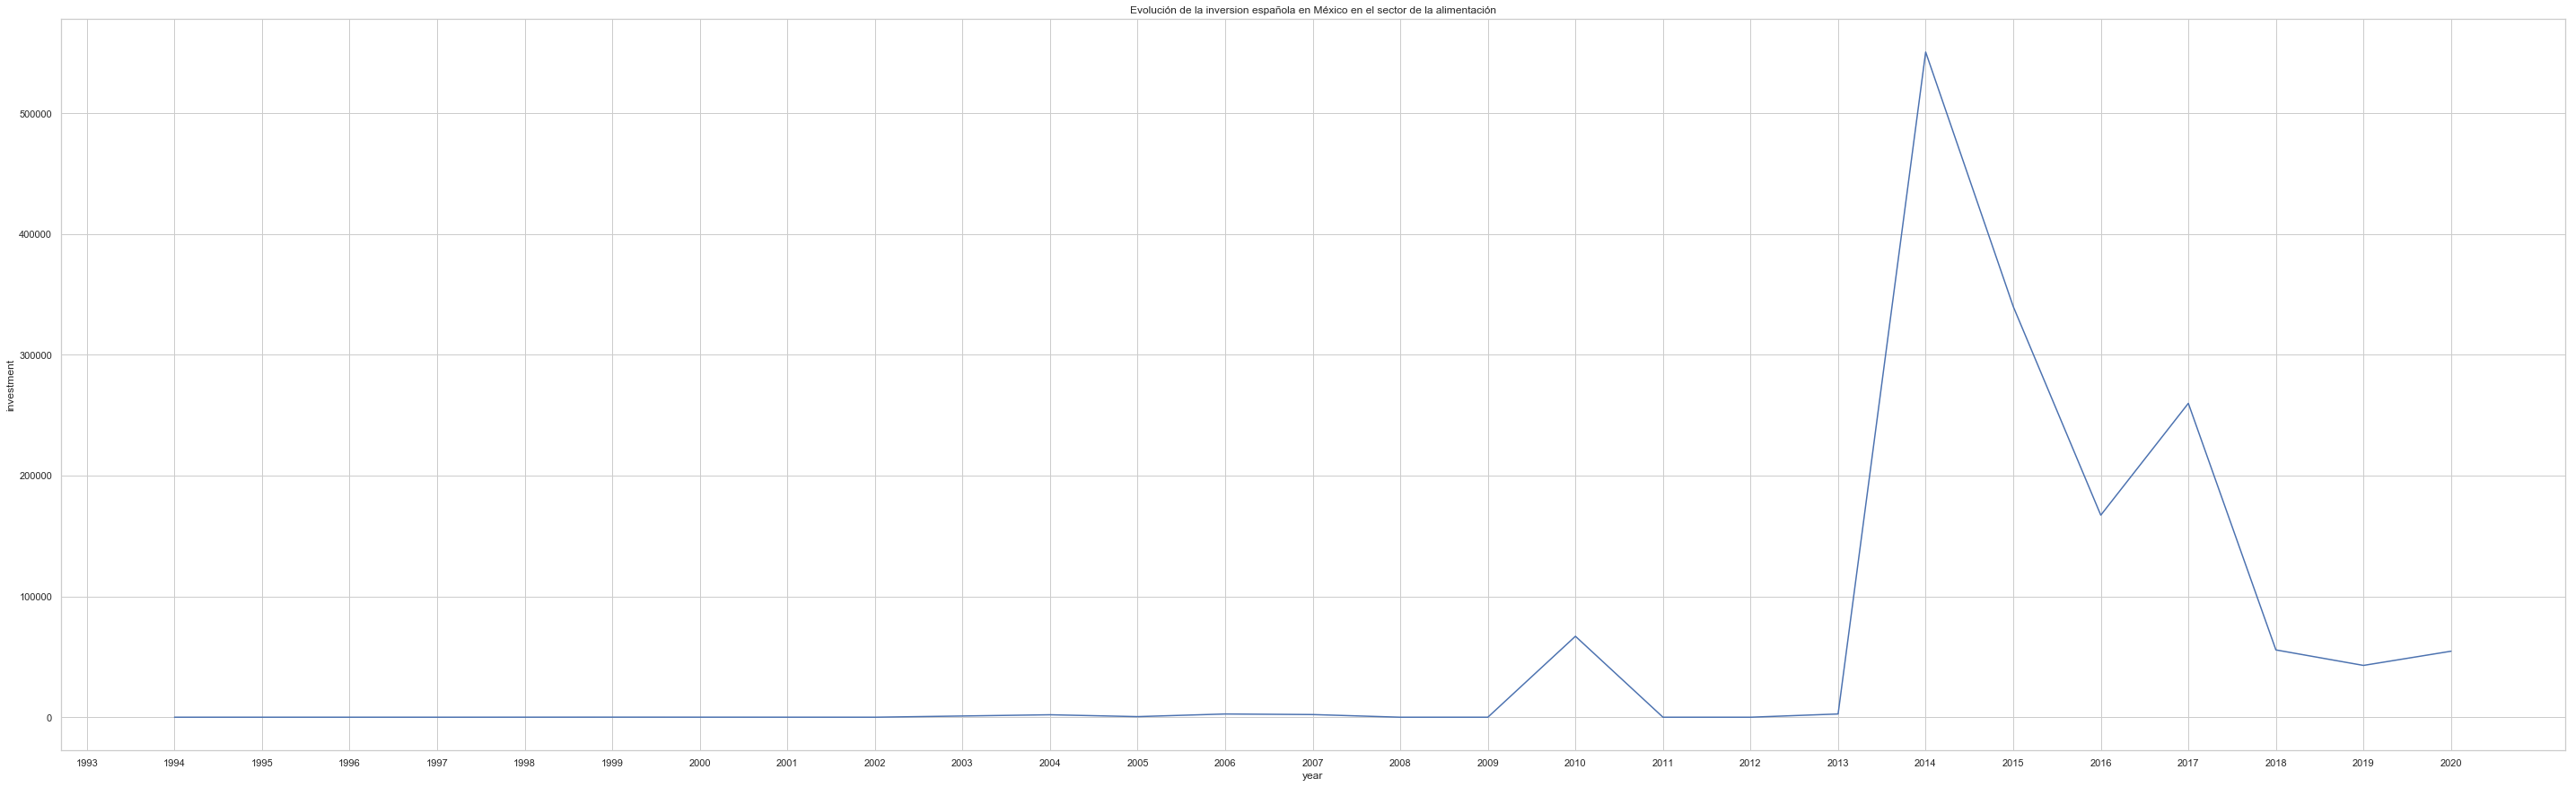

In [51]:
plt.figure(figsize=(50,15))
sns.lineplot(data=df_alimentacion, x='year', y='investment') 
plt.title('Evolución de la inversion española en México en el sector de la alimentación')

In [52]:
df_residuos = df_melt[df_melt.industry == '38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESIDUOS']
df_residuos.head()

,investment,country,industry
year,,,
1993,NaN,MEXICO,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI..."
1994,NaN,MEXICO,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI..."
1995,NaN,MEXICO,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI..."
1996,NaN,MEXICO,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI..."
1997,NaN,MEXICO,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI..."


Text(0.5, 1.0, 'Evolución de la inversion española en México en el sector de los residuos')

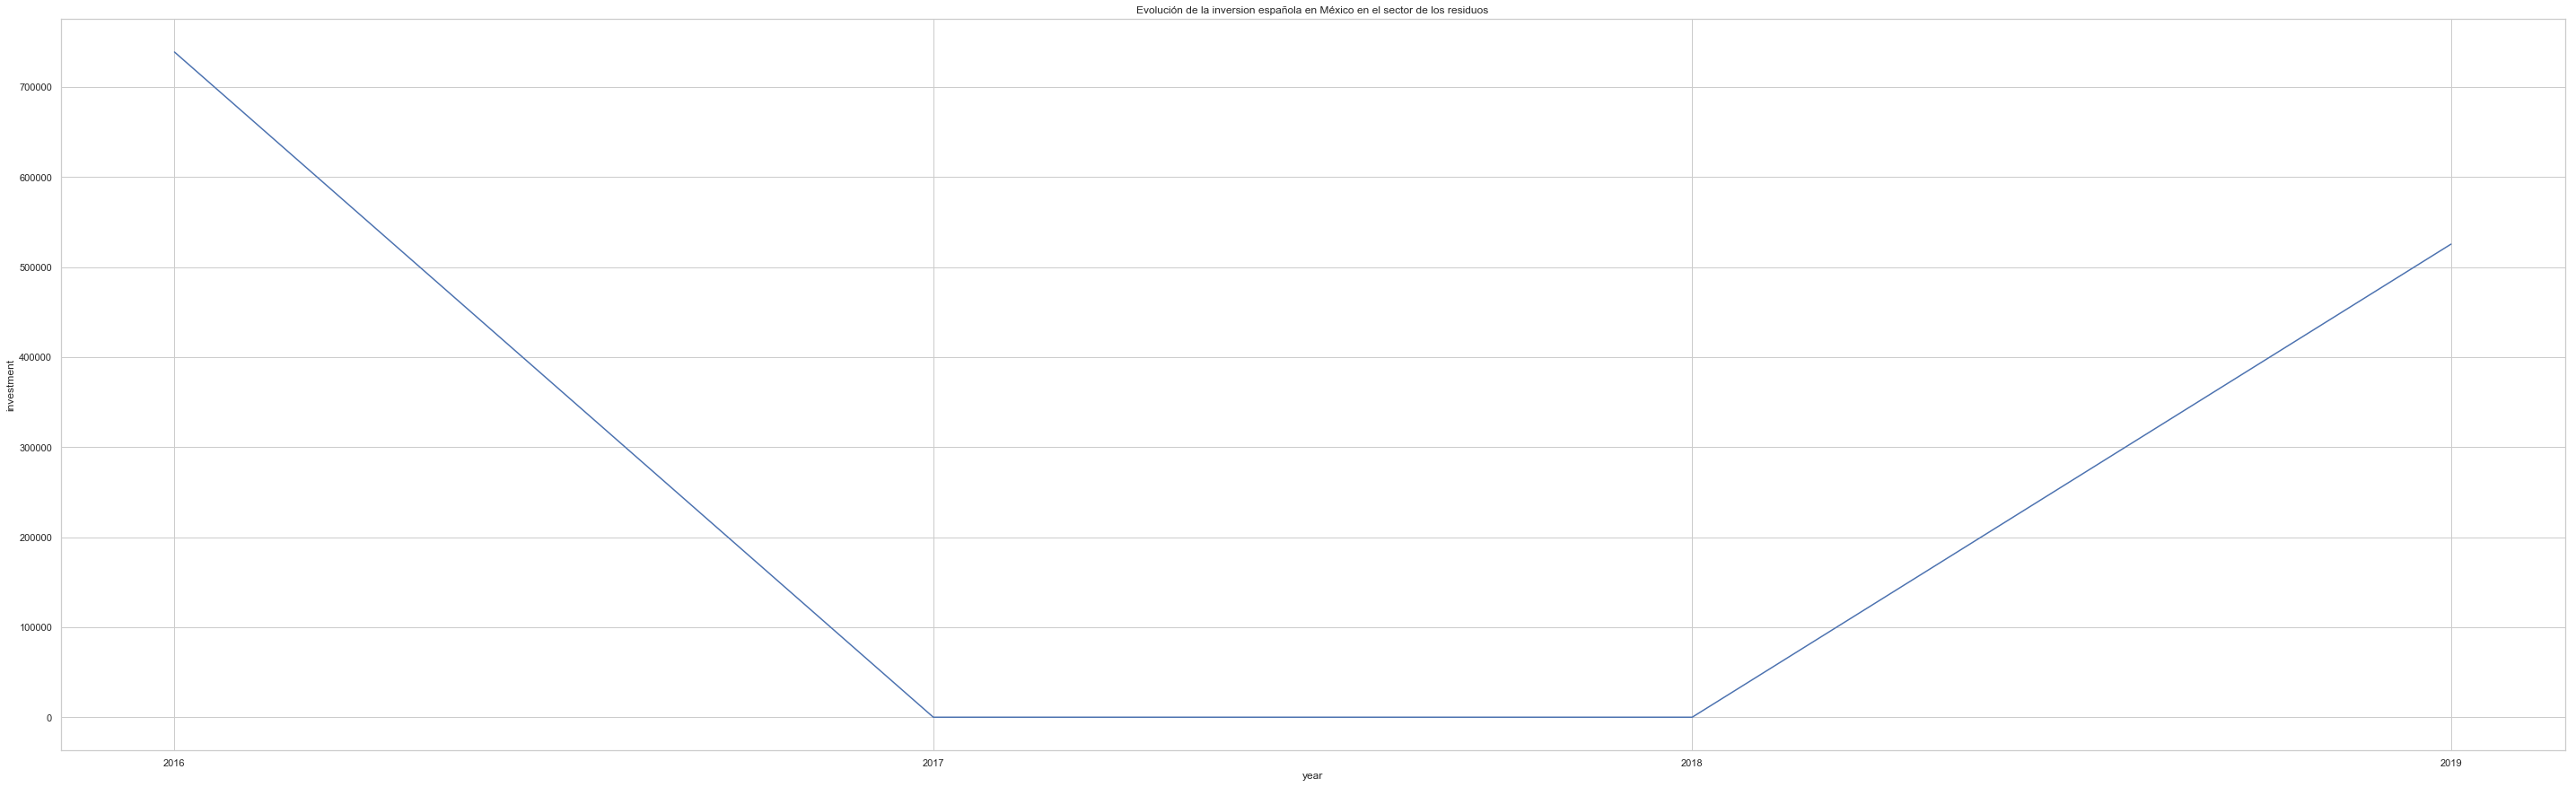

In [53]:
plt.figure(figsize=(50,15))
sns.lineplot(data=df_residuos, x='year', y='investment')
plt.title('Evolución de la inversion española en México en el sector de los residuos')

In [54]:
df_inmobiliario = df_melt[df_melt.industry == '68 ACTIVIDADES INMOBILIARIAS']
df_inmobiliario.head()

,investment,country,industry
year,,,
1993,29436.13,MEXICO,68 ACTIVIDADES INMOBILIARIAS
1994,2322.62,MEXICO,68 ACTIVIDADES INMOBILIARIAS
1995,1821.18,MEXICO,68 ACTIVIDADES INMOBILIARIAS
1996,2151.02,MEXICO,68 ACTIVIDADES INMOBILIARIAS
1997,27817.97,MEXICO,68 ACTIVIDADES INMOBILIARIAS


Text(0.5, 1.0, 'Evolución de la inversion española en México en el sector de inmobiliario')

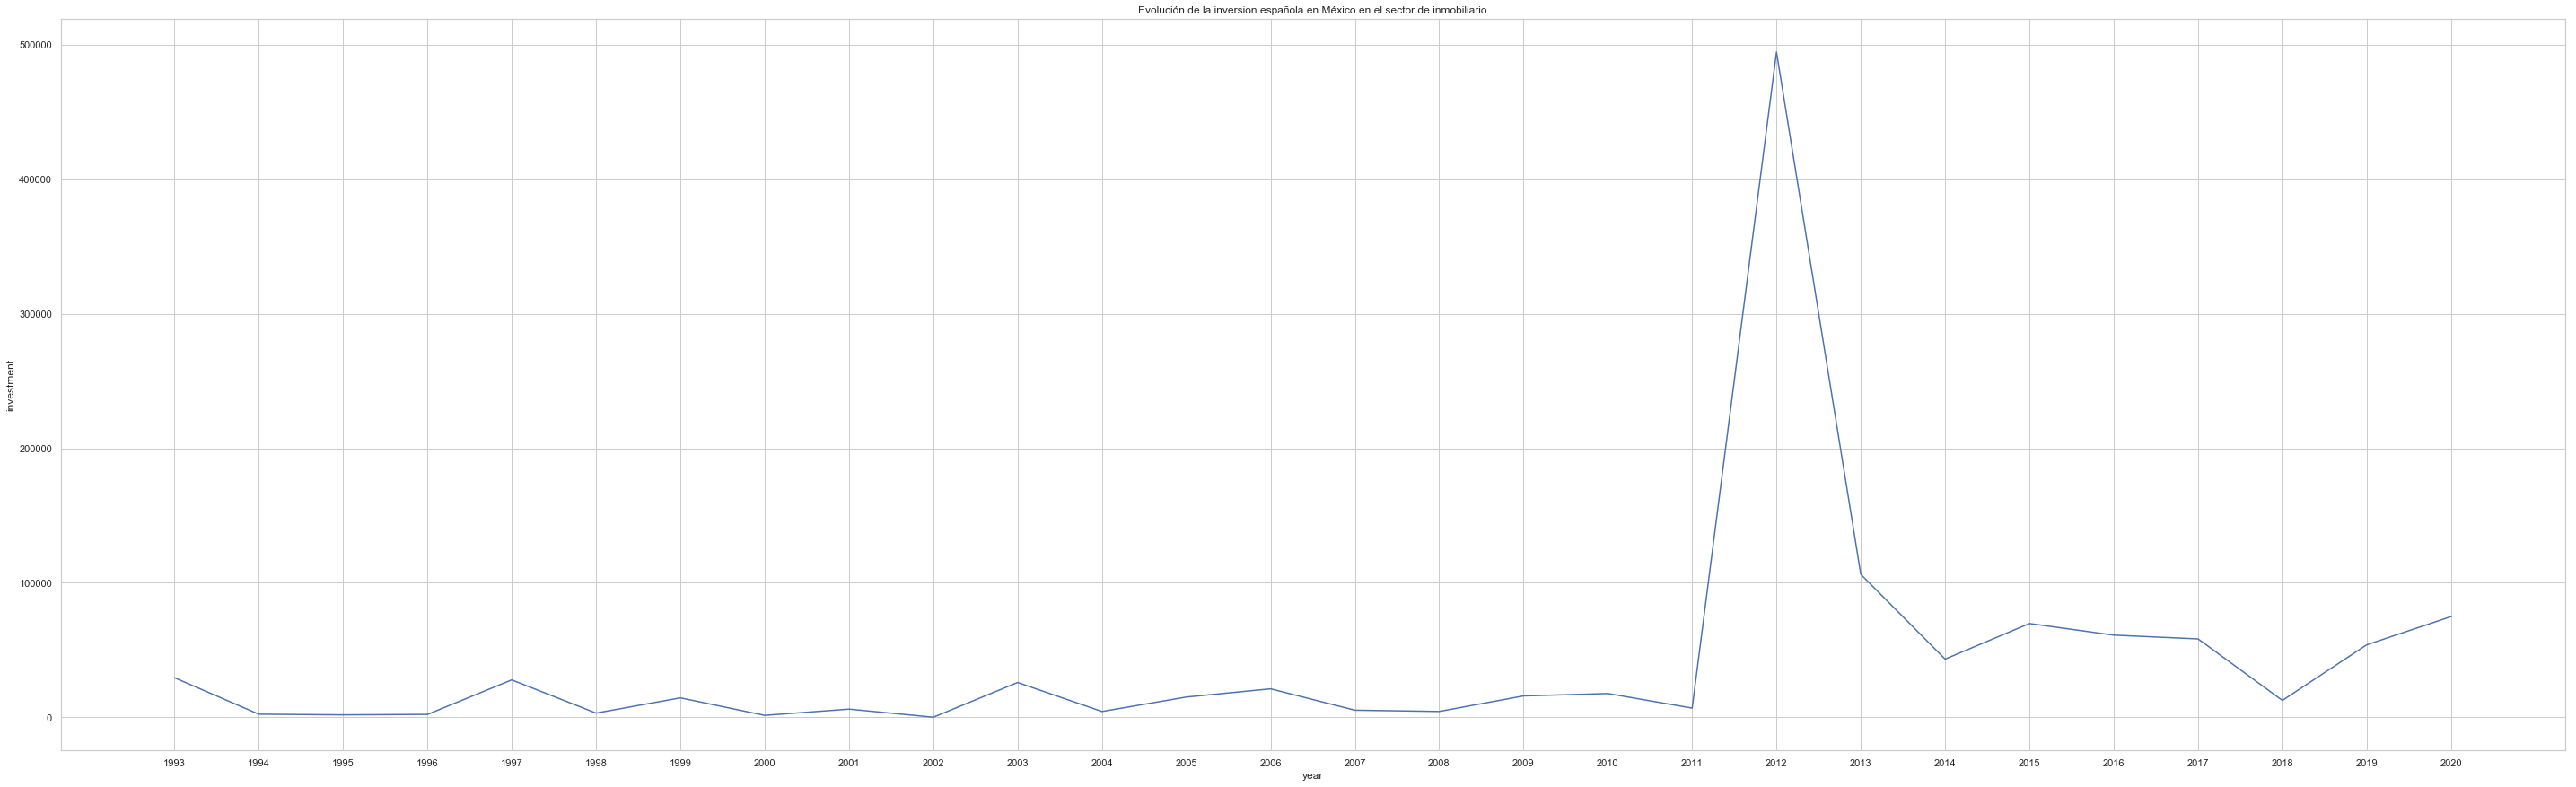

In [55]:
plt.figure(figsize=(50,15))
sns.lineplot(data=df_inmobiliario, x='year', y='investment')
plt.title('Evolución de la inversion española en México en el sector de inmobiliario')

In [56]:
df.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,MEXICO,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [57]:
df = df.drop(['country'], axis=1)

In [59]:
df.head()

,industry,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,NaN,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN
